## Student Performance Indicator

#### Lifecycle of machine learning project
- Understanding the problem statement
- Data collection
- Data checks to perform 
- Exploratory data analysis
- Data pre-procession
- Model training
- Choose best model

### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and test preparation course.


### 2) Data Collection
- Dataset source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetID=74977
- This data consists of 8 columns and 1000 rows.

#### 2.1. Import data and required packages
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Warnings

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Import CSV data as a pandas dataframe
df = pd.read_csv('data/stud.csv')

In [4]:
# Display first five rows of data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Display shape (rows,columns) of dataset
df.shape

(1000, 8)

#### 2.2. Dataset information
- Gender : sex of students (Male/Female)
- Ethnicity/Race : Ethnicity of students (Group A,B,C,D,E)
- Parental level of education : Parents final education (Bachelor's degree,some college,Master's degree,associate's degree,high school)
- Lunch : Having lunch before test (Standard or free / reduced)
- Test preparation course : complete or not complete before test
- Math score 
- Reading score 
- Writing score

#### 3. Data checks to perform
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

In [6]:
# Checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
# Check duplicates
df.duplicated().sum()

0

In [8]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Checking the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# Check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
# Checking various categories in different categorical columns 
print("Categories in 'gender' variable : ",df['gender'].unique())
print("Categories in 'race/ethnicity' variable : ",df['race_ethnicity'].unique())
print("Categories in 'parental level of education' variable : ",df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable : ",df['lunch'].unique())
print("Categories in 'test preparation course' variable : ",df['test_preparation_course'].unique())


Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [24]:
# Define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

# Print numeric_features & categorical_features
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [26]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [27]:
# Adding columns (math score, reading score, writing score) to total_score and average_score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
# Students who got full marks in different subjects
reading_full = df[df['reading_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()

print("Number of students with full marks in reading : {}".format(reading_full))
print("Number of students with full marks in maths : {}".format(math_full))
print("Number of students with full marks in writing : {}".format(writing_full))

Number of students with full marks in reading : 17
Number of students with full marks in maths : 7
Number of students with full marks in writing : 14


In [33]:
# Students who got less than or equal to 20 in different subjects
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()

print("Number of students with less than 20 marks in reading : {}".format(reading_less_20))
print("Number of students with less than 20 marks in maths : {}".format(math_less_20))
print("Number of students with less than 20 marks in writing : {}".format(writing_less_20))

Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in maths : 4
Number of students with less than 20 marks in writing : 3


<Axes: xlabel='average_score', ylabel='Count'>

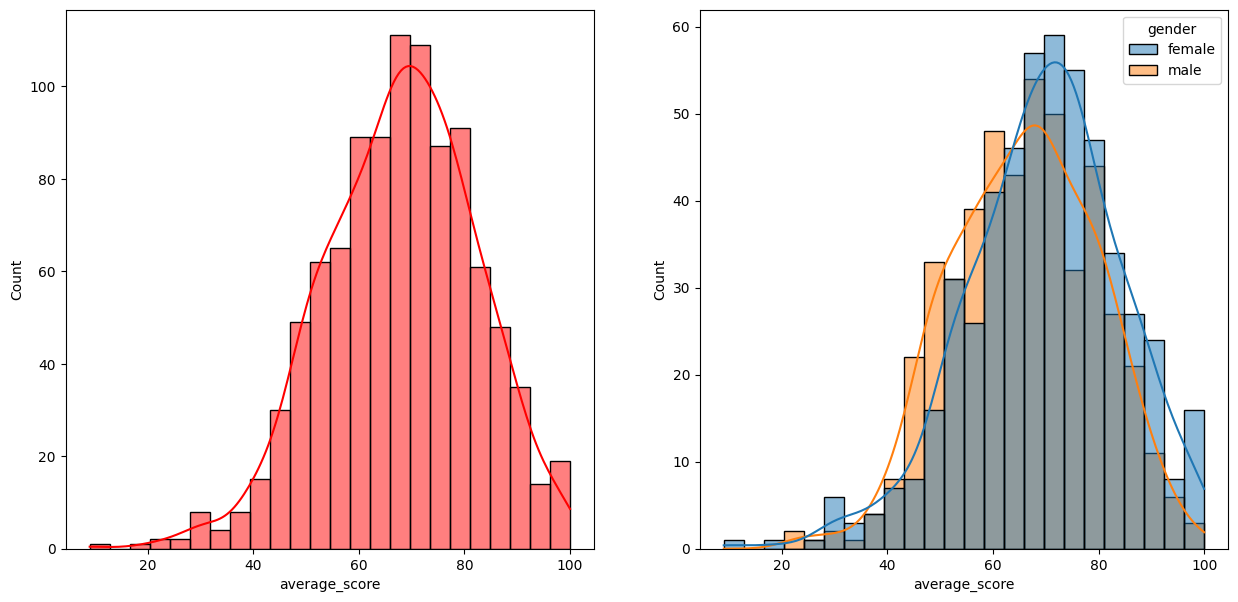

In [ ]:
# Average of students and average of students based on gender
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

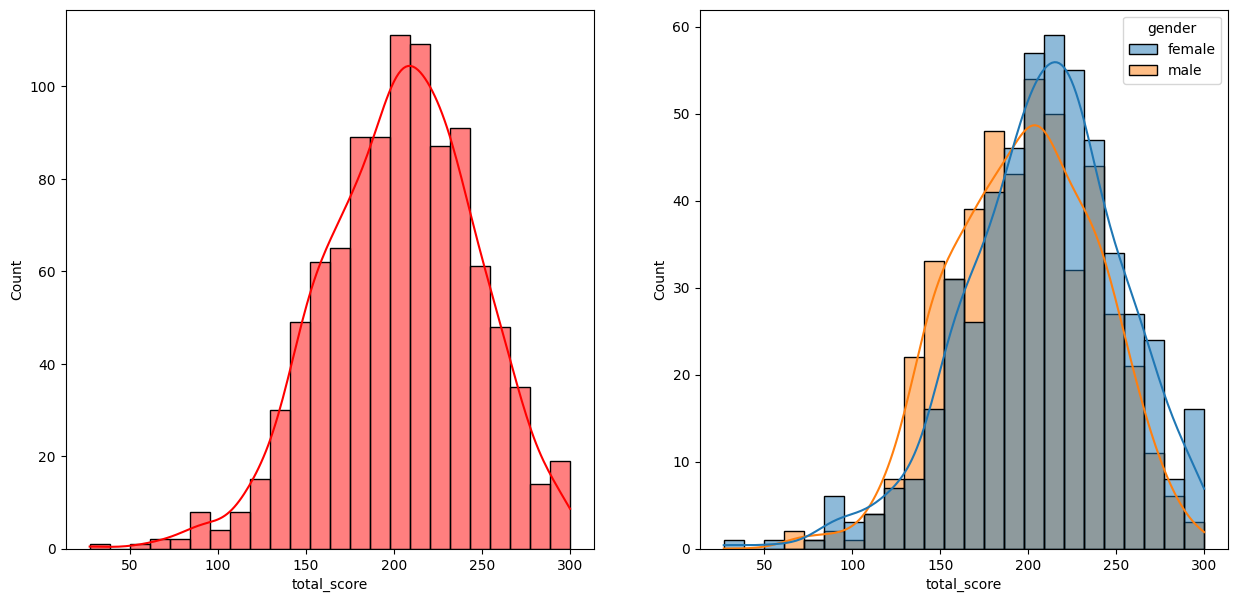

In [43]:
# Total score of students and total score of students based on gender
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

<Axes: xlabel='average_score', ylabel='Count'>

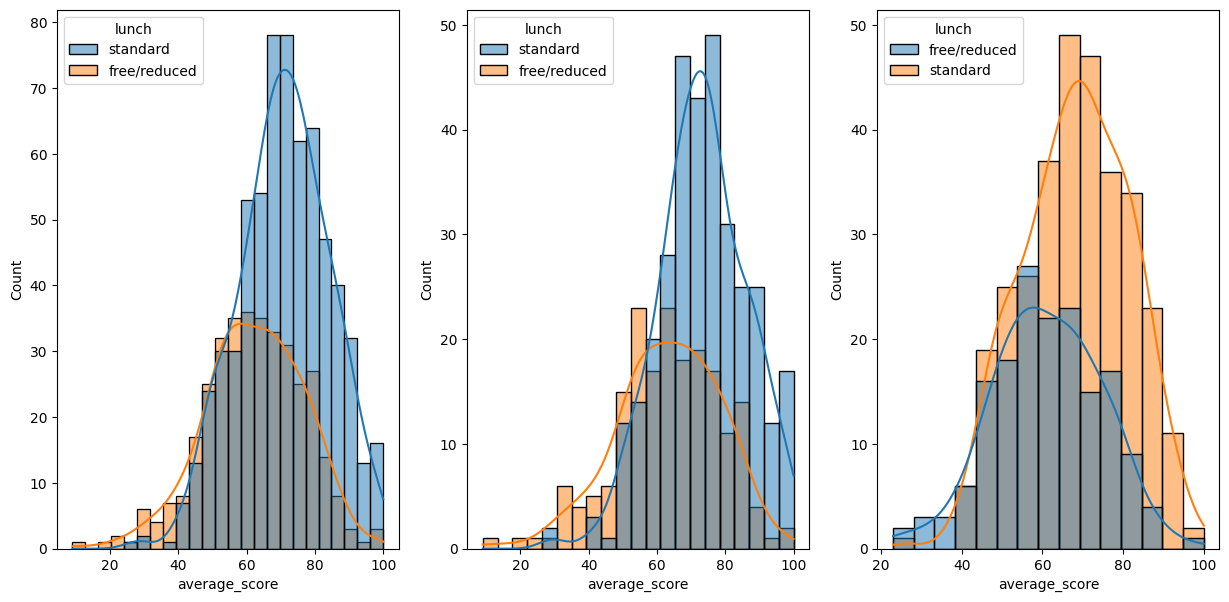

In [48]:
# Performance based on lunch
plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')

<Axes: xlabel='average_score', ylabel='Count'>

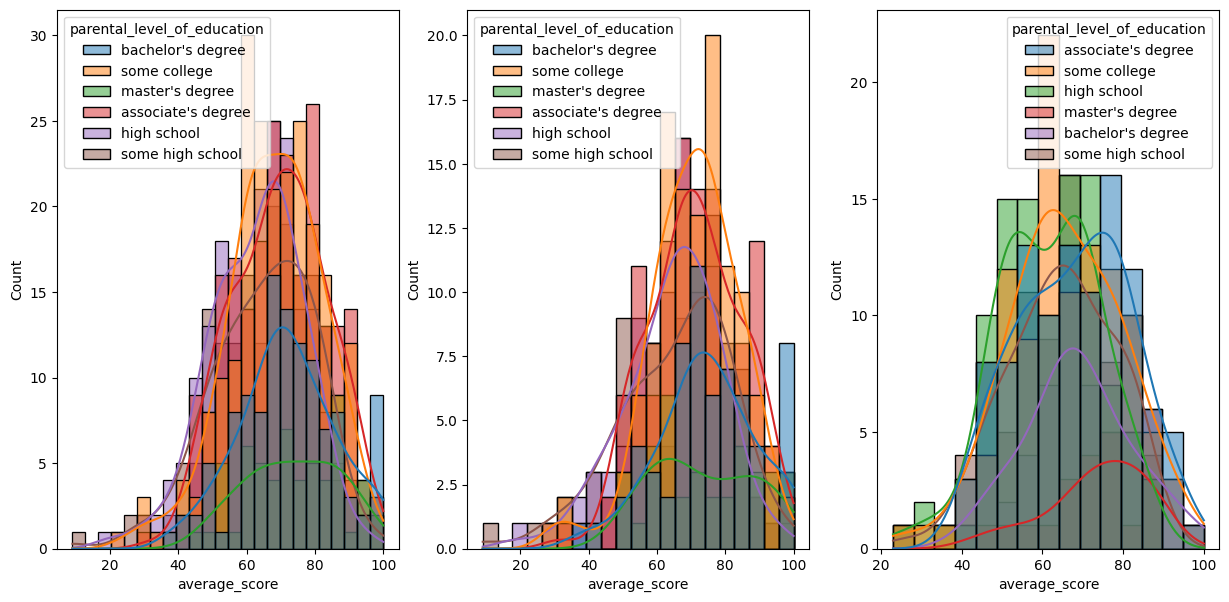

In [49]:
# Performance based on parental level of education
plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

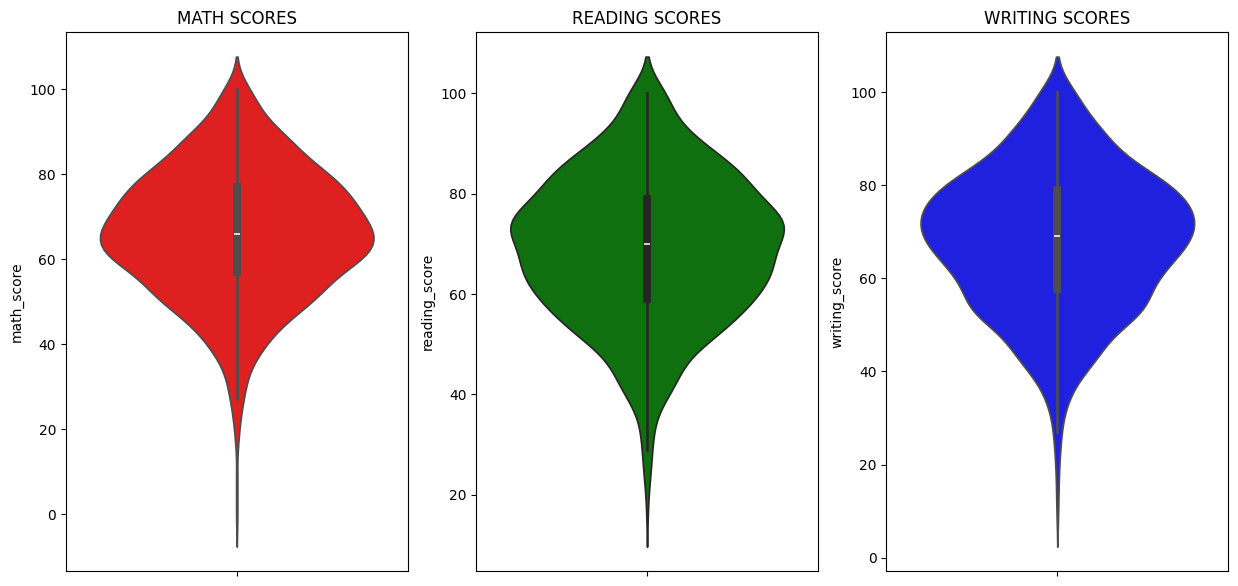

In [55]:
# Maximum score of students in all 3 subjects 
plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
plt.title("MATH SCORES")
sns.violinplot(data=df,y='math_score',color='r')
plt.subplot(1,3,2)
plt.title("READING SCORES")
sns.violinplot(data=df,y='reading_score',color='g')
plt.subplot(1,3,3)
plt.title("WRITING SCORES")
sns.violinplot(data=df,y='writing_score',color='b')


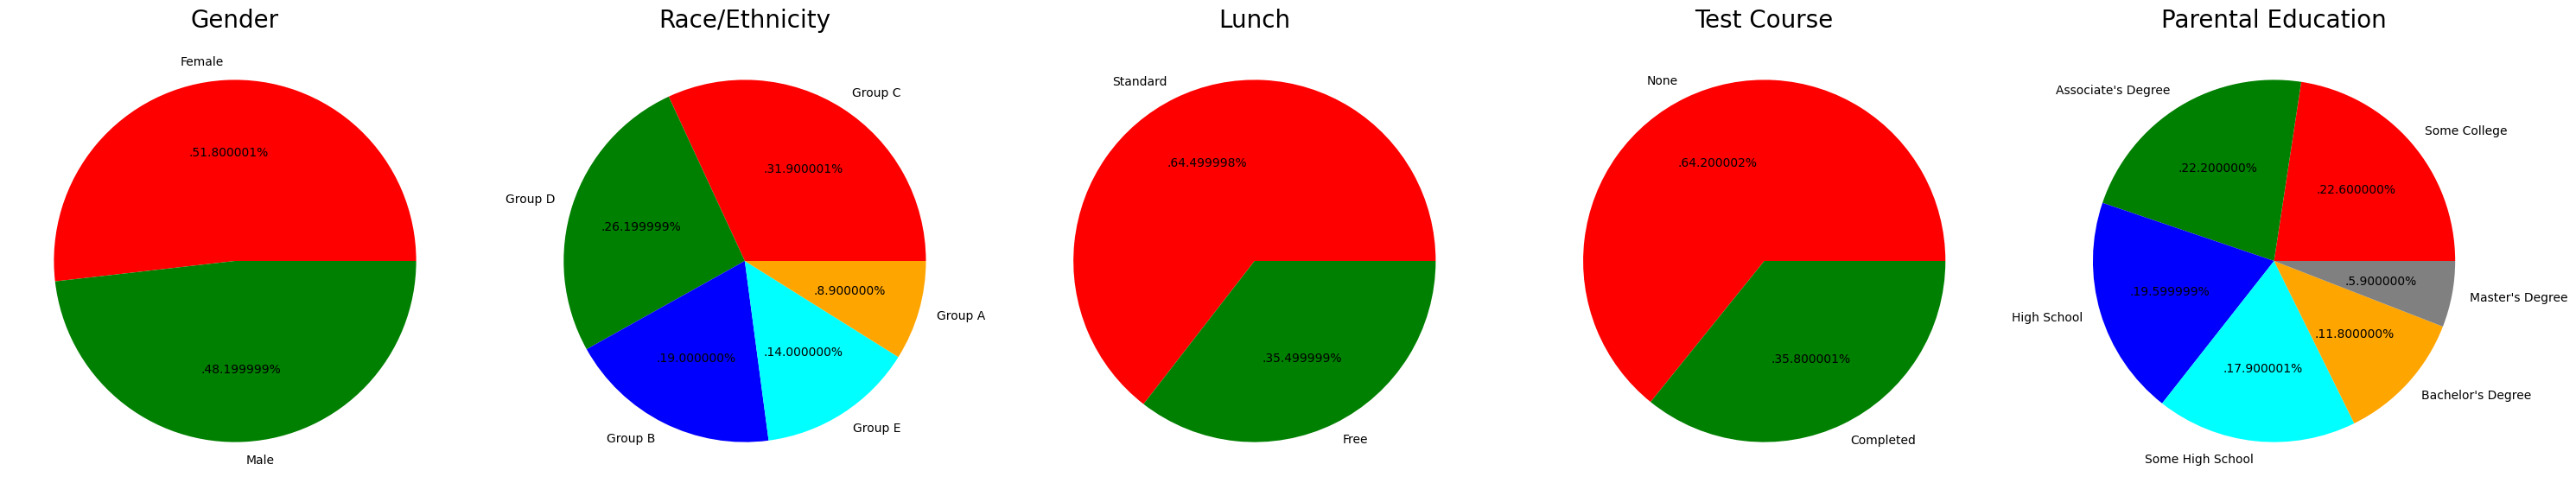

In [59]:
# Multivariate analysis using pieplot
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()